<a href="https://colab.research.google.com/github/rafaelbsouza/Portfolio/blob/master/Analisando_os_Dados_do_Airbnb_Vancouver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by [Rafael Souza](https://www.linkedin.com/in/rbssouza)*

---

# Análise dos Dados do Airbnb - *Vancouver*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


**Neste *notebook*, iremos analisar os dados referentes à cidade de Vancouver - Canada, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados disponibilizados neste notebook, foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para a análise exploratória inicial, usaremos apenas o arquivo abaixo:

* **listings.csv** - Summary information and metrics for listings in Vancouver (good for visualisations).

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/bc/vancouver/2020-05-11/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28772,-123.12110,Entire home/apt,151,90,16,2017-02-26,0.15,49,347
1,13188,Garden level studio in ideal loc.,51466,Family Guns,NaN,Riley Park,49.24577,-123.10516,Entire home/apt,120,2,242,2020-04-30,1.94,1,211
2,13357,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,52118,Liliana,NaN,Downtown Eastside,49.27955,-123.10546,Entire home/apt,161,30,58,2020-03-24,0.47,3,335
3,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28209,-123.12515,Entire home/apt,70,30,427,2019-08-04,3.54,1,57
4,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25550,-123.06696,Entire home/apt,145,30,85,2020-04-18,0.78,1,326


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Prosseguiremos a nossa análise, identificando a quantidade de entradas que o nosso conjunto de dados possuí e verificaremos os tipos de cada coluna.

O conjunto de dados que baixamos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é a versão sumarizada dos dados disponibilizados pelo Airbnb. No site supracitado é possível encontrar a versão completa de todas as entradas e variáveis.

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print ("Variáveis:\t {}\n".format(df.shape[1]))

# Identificar as variáveis (colunas) do nosso dataset
display(df.dtypes)

Entradas:	5806
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante avaliar desde o inicio se esses valores nulos são significativos se comparado com o total de entradas que temos disponível.

Neste primeiro tratamento, conseguimos identificar as seguintes situações:

* A variável **neighbourhood_group** em todo nosso *dataset* possui 100% dos seus valores não informados/faltantes.
* As variáveis **reviews_per_month** *(quantidade de reviews por mês)* e **last_review** *(data do último review)* possuem valores nulos em aproximadamente 15% das linhas.
* A variavel **name** *(nome da propriedade anunciada)* não é preenchida em menos de 0,1% dos casos.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.149501
last_review                       0.149501
name                              0.000172
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, usaremos um gráfico de histograma (distribuição de frequências).

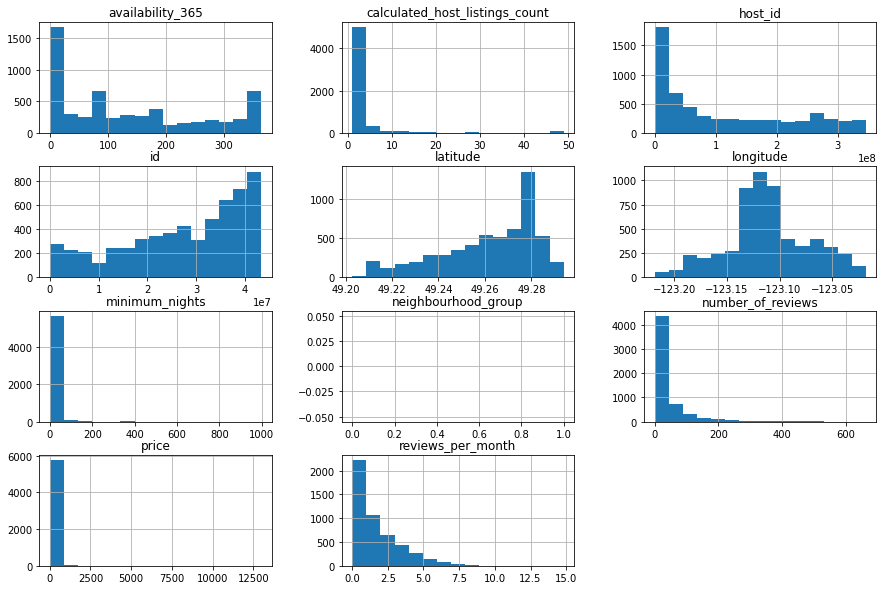

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Quando procuramos por um imóvel, sempre é bom saber a média de preços praticada naquela região. Com isso em mente, abaixo podemos observar que a média de preço do aluguel na cidade de Vancouver é de aproximadamente U$175,00 por diária.

In [0]:
# ver a média da coluna `price``
df.price.mean()

174.2950396141922

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [32]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.007959,-0.058130,-0.033983,-0.060685,0.053144
minimum_nights,-0.007959,1.000000,-0.086801,-0.155215,0.173520,0.131619
number_of_reviews,-0.058130,-0.086801,1.000000,0.674807,-0.149451,0.044579
reviews_per_month,-0.033983,-0.155215,0.674807,1.000000,-0.174137,0.011730
calculated_host_listings_count,-0.060685,0.173520,-0.149451,-0.174137,1.000000,0.099277
availability_365,0.053144,0.131619,0.044579,0.011730,0.099277,1.000000


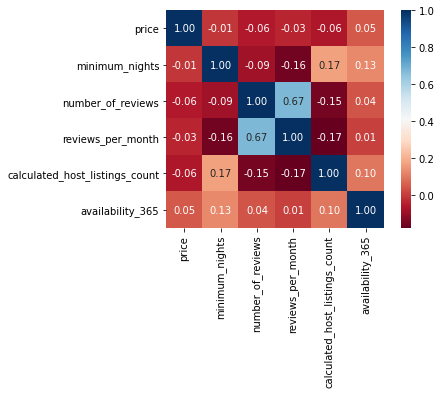

In [33]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

Para responder essa pergunta iremos utilizar a variavel *room_type* disponível no nosso dataset e utilizando do método ***value_counts()***, é possível somar todas as entradas e identificarmos de forma fácil o que mais se oferta nos anúncios da Airbnb. Veja abaixo:


In [6]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    4244
Private room       1496
Shared room          53
Hotel room           13
Name: room_type, dtype: int64

In [7]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.730968
Private room       0.257664
Shared room        0.009128
Hotel room         0.002239
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara da cidade de Vancouver?**

Uma maneira de se verificar uma variável em função da outra é usando **groupby()**. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [8]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Kitsilano            227.258873
Downtown             218.203258
Dunbar Southlands    202.067073
Downtown Eastside    194.103560
West Point Grey      190.895238
West End             177.350267
Oakridge             173.129630
Arbutus Ridge        171.564356
Shaughnessy          169.469880
South Cambie         165.882353
Name: price, dtype: float64

Acima, vemos os 10 bairros mais caros para se alugar em Vancouver por dia. 

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Já sabemos a média de preço, os bairros mais caros para se locar, agora iremos verificar a média de dias que os anunciantes determinam para realizar a locação desses espaços. Veja:


In [11]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()


14.157940062004823

Acima vemos que a média dos anuncios são cadastrados com o mínimo de 14 dias para a locação. 


Como os dados que estamos analisando nos é fornecido as informações de longitude e latitude dos imóveis cadastrados, abaixo iremos plotar um mapa para cada ponto da Cidade de Vancouver. 

Iremos considerar **x=longitude** e **y=latitude**:


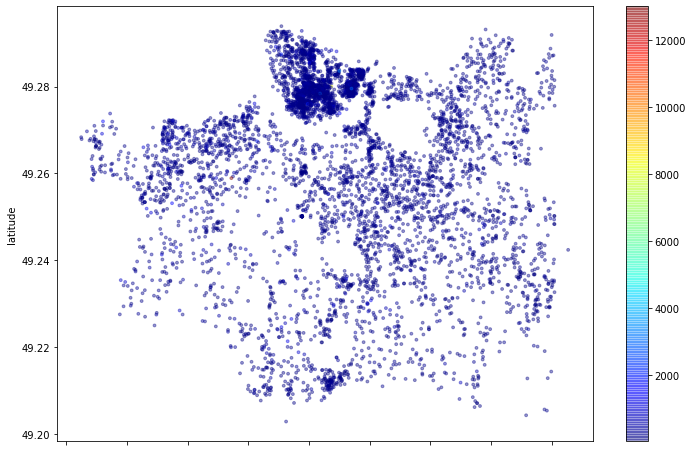

In [14]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Com os dados sumarizados disponibilizados pela [Inside Airbnb](http://insideairbnb.com/get-the-data.html), realizamos análises de forma superficial a fim de entender melhor como é o mercado de locação de imóveis na cidade de Vancouver. 

Conseguimos identificar que a média de preço nos bairros são bem parecidas (tirando algumas excessões que são consideradas Outliers), e que a maior concentração de anuncio ocorre no Norte da cidade e próximo ao aeroporto.

Lembrando que essa análise exploratória incial se baseou nos dados resumidos. Recomenda-se que seja usado, em uma próxima análise, os dados completos onde podemos analisar um conjunto maior de variáveis e tirar uma gama maior de insights. 
